#Import (ignore)

In [ ]:
import numpy as np
import pandas as pd

# Plot
from matplotlib import pyplot as plt
import seaborn as sn

# Features Selection
from sklearn.ensemble import ExtraTreesClassifier

# Split Sataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# K-Fold Cross Validation
from sklearn import model_selection

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Tune Hyperparameters
from sklearn.model_selection import GridSearchCV

# M.L. Report
from sklearn.metrics import accuracy_score , classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT_Heart/heart.csv')

# Abstract
The only purpose of this paper is to obtain the final score for the dataset with duplicate observations.

This final score will be used in another document to evaluate the impact on true accuracy, this is why comments will be reduced to a minimum (and also because they are dealt with in more detail in the other document).

#**Dataset**





| Features | Description | Possible values |
| --- | --- | --- |
| age |  |  |
| sex |  | 1 = Male, 0 = Female |
| cp | chest pain type | 0 = Typical Angina 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic |
| trestbps | resting blood pressure, mmHg |  |
| chol | serum cholestoral in mg/dl |  |
| fbs | fasting blood sugar > 120 mg/dl | 0 = False, 1 = True |
| restecg | resting electrocardiographic results | 0 = Normal, 1 = ST-T Wave Abnormality, 2 = Showing probable or definite left ventricular hypertrophy |
| thalach | maximum heart rate achieve |  |
| exang | exercise induced angina | 1 = Yes, 0 = No |
| oldpeak | ST depression induced by exercise relative to rest |  |
| slope	 | The slope of the peak exercise ST segment | 0 = Upsloping, 2 = Flat, 3 = Downsloping |
| ca | number of major vessels (0-3) colored by flourosopy |  |
| thal | A blood disorder known as thalassaemia | 3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect |
| target | The patient has a heart disease | 0 = No, 1 = Yes |

        

trestbps: The optimal blood pressure level is a reading under 120/80 mmHg. A reading that is higher would be considered elevated or high.

chol: The desirable cholesterol level for adults is less than 200 mg/dl.
        
      
        




## Rename features

In [ ]:
data.columns = ['age', 'sex', 'chest_pain', 'rest_blood_pressure', 'cholesterol', 'fast_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassaemia', 'target']


# Features Selection

### Extra Trees Classifier


 fast_blood_sugar - 2.020214%
 rest_ecg - 3.541009%
 sex - 5.747829%
 cholesterol - 5.985939%
 rest_blood_pressure - 6.212284%
 st_slope - 6.597077%
 age - 7.120792%
 max_heart_rate - 8.856279%
 st_depression - 9.189949%
 exercise_induced_angina - 10.125850%
 thalassaemia - 10.422541%
 chest_pain - 12.041002%
 num_major_vessels - 12.139235%


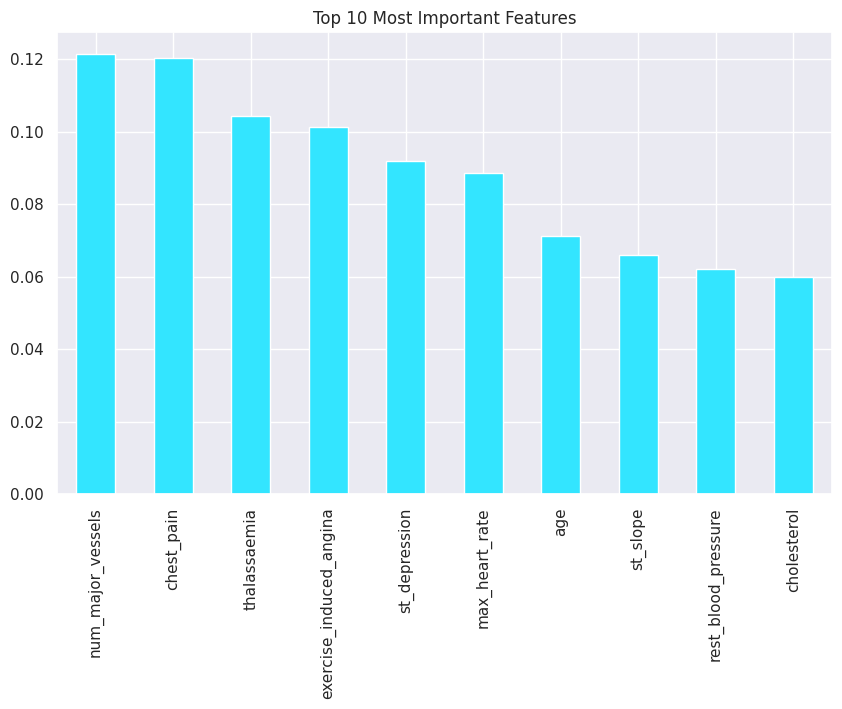

In [ ]:
X = data.iloc[:,0:13]
Y = data.iloc[:,-1] # target column


# Building the model
extratrees = ExtraTreesClassifier(n_estimators=250 , random_state=0) # n_estimators = # of tree

# Training the model
extratrees.fit(X,Y)

#plot setting
sn.set(style="darkgrid")
plt.figure(figsize=(10,6))
plt.title("Top 10 Most Important Features")


#to get the first 10 important for plotting
feat_importances = pd.Series(extratrees.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar', color='#33e5ff')


# Computing the importance of each feature
importance = extratrees.feature_importances_

feature_labels=np.array(X.columns)

#sort by importance
feature_indexes_by_importance = importance.argsort()

#print (all feature) in % form, descend
for index in feature_indexes_by_importance:
    print(" {} - {:2f}%".format( feature_labels[index], (importance[index] * 100.0)))


plt.show()



# Dataset preparation

### Create new dataset with selected features

In [ ]:
data_selected = data[['age', 'chest_pain', 'rest_blood_pressure', 'cholesterol', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassaemia', 'target']]

## Split dataset

In [ ]:
y = data_selected['target']
x = data_selected.drop('target' ,axis=1)

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(x) , columns = x.columns)

X_train , X_test , Y_train , Y_test = train_test_split(X,y ,train_size=0.8) #80% train - 20% test

# **Model**



Selected Algorithms:
1. Logistic Regression (LR)
2. Decision Tree Classifier (DTC)
3. Random Forest Classifier (RFC)
4. Support Vector Machines (SVM)
5. K-Neighbors Classifier (KNN)
6. Naive Bayes (NB)

## K-fold Cross Validation

In [ ]:
# Classification models
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=5000)))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('SVM', SVC(gamma='scale')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

# evaluate accuracy for each model
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.824390 (0.045368)
DTC: 0.986585 (0.011505)
RFC: 0.993902 (0.009832)
SVM: 0.864634 (0.026410)
KNN: 0.830488 (0.026967)
NB: 0.798780 (0.051811)


##Tune Hyperparameters


In [ ]:
#def print_model_paramater(dictionary):
#  keys =[]
#  values=[]
#  stringa = ""
#  for key, value in dictionary:
#      keys.append(key)
#      values.append(value)
#      stringa+=str(key)+'='+str(value) + ', '
#
#  print(stringa[:-2])

###Logistic Regression

In [ ]:
# Create the model
logreg = LogisticRegression(random_state=0, max_iter=5000, solver='liblinear')

#Parameters for grid search
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)
#print_model_paramater(grid.best_params_.items())

LogisticRegression_best_model = grid.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy:  0.8365853658536585
Model:  LogisticRegression(C=100, max_iter=5000, random_state=0, solver='newton-cg')
Best parameters:  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


###Decision Tree

In [ ]:
# Create the model
decision_tree = DecisionTreeClassifier(random_state=0)

#Parameters for grid search
max_depth = [3, 6, 10, 20, 30, 50]
max_features = [1.0, 0.5, 0.1]
min_samples_leaf = [3, 6, 9, 12, 15, 30]
min_samples_split = [2, 4, 8, 15, 25]

param_grid = dict(max_depth=max_depth,max_features=max_features,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)

grid = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)
#print_model_paramater(grid.best_params_.items())

DecisionTreeClassifier_best_model = grid.best_estimator_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Accuracy:  0.9243902439024391
Model:  DecisionTreeClassifier(max_depth=10, max_features=0.5, min_samples_leaf=3,
                       random_state=0)
Best parameters:  {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 2}


###Random Forest

In [ ]:
# Create the model
forest = RandomForestClassifier(random_state=0)

#Parameters for grid search
n_estimators = [200, 300, 500, 750]
max_features = ['sqrt', 'log2']
param_grid = dict(n_estimators=n_estimators,max_features=max_features)


grid = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)
#print_model_paramater(grid.best_params_.items())


RandomForestClassifier_best_model = grid.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Accuracy:  0.978048780487805
Model:  RandomForestClassifier(n_estimators=200, random_state=0)
Best parameters:  {'max_features': 'sqrt', 'n_estimators': 200}


###Support Vector Machine (SVM)

In [ ]:
# Create the model
svm = SVC()

#Parameters for grid search
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
param_grid = dict(kernel=kernel,C=C,gamma=gamma)
grid = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)
#print_model_paramater(grid.best_params_.items())

SVC_best_model = grid.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy:  0.9304878048780487
Model:  SVC(C=50, kernel='poly')
Best parameters:  {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}


###K-Nearest Neighbour (KNN)

In [ ]:
# Create the model
knn = KNeighborsClassifier()

#Parameters for grid search
n_neighbors = [1, 50]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
param_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)
#print_model_paramater(grid.best_params_.items())

KNeighborsClassifier_best_model = grid.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy:  0.9792682926829268
Model:  KNeighborsClassifier(metric='manhattan', n_neighbors=50, weights='distance')
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'distance'}


###Naive Bayes

In [ ]:
# Create the model
gaussNB = GaussianNB()

#Parameters for grid search
var_smoothing= np.logspace(0,-9, num=100)
param_grid = dict(var_smoothing=var_smoothing)
grid = GridSearchCV(estimator=gaussNB, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=4) # cv = 5 to use the default 5-fold cross validation

# Run grid search on the training data
grid.fit(X_train,Y_train)

# print score
print("Accuracy: ",grid.best_score_)
print("Model: ",grid.best_estimator_)
print("Best parameters: ",grid.best_params_)
#print_model_paramater(grid.best_params_.items())

GaussianNB_best_model = grid.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy:  0.8121951219512196
Model:  GaussianNB(var_smoothing=0.01)
Best parameters:  {'var_smoothing': 0.01}


### Repeat k-Fold Cross Validation with  Tuned  Hyperparameters

In [ ]:
# Classification models
models = []
models.append(('LR', LogisticRegression_best_model))
models.append(('DTC', DecisionTreeClassifier_best_model))
models.append(('RFC', RandomForestClassifier_best_model))
models.append(('SVM', SVC_best_model))
models.append(('KNN', KNeighborsClassifier_best_model))
models.append(('NB', GaussianNB_best_model))


# evaluate accuracy for each model
tune_results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    tune_results.append(cv_results)
    #names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.832927 (0.041553)
DTC: 0.908537 (0.028470)
RFC: 0.987805 (0.014429)
SVM: 0.936585 (0.025464)
KNN: 0.989024 (0.011505)
NB: 0.807317 (0.058689)


In [ ]:
print("Default model\t\t\tTuned model\t\t\tImprovement")
improvement = []
final_score = []
default_parameter = []
best_ml={"model": "", "accuracy" : 0.0, "counter" : 0}
for i in range(len(names)):
  msg = "%s: %f (%f)" % (names[i], results[i].mean(), results[i].std())
  msg2 = "%f (%f)" % (tune_results[i].mean(), results[i].std())
  imp = tune_results[i].mean()-results[i].mean()
  improvement.append(imp)

  print("{} \t {}\t\t{}".format(msg,msg2,improvement[i]))

  if (tune_results[i].mean() > results[i].mean()): #there is an improvement
    final_score.append(tune_results[i].mean())
  else:
    final_score.append(results[i].mean())
    default_parameter.append(names[i])

  if best_ml.get("accuracy") < final_score[i]:
    best_ml.update({"model": names[i], "accuracy" : final_score[i], "counter" : i})

print("\n\nFor the following Model there will be use the default parameters: ",default_parameter)


Default model			Tuned model			Improvement
LR: 0.819512 (0.048413) 	 0.832927 (0.048413)		0.013414634146341475
DTC: 0.985366 (0.015232) 	 0.908537 (0.015232)		-0.076829268292683
RFC: 0.987805 (0.007713) 	 0.987805 (0.007713)		0.0
SVM: 0.852439 (0.044791) 	 0.936585 (0.044791)		0.08414634146341471
KNN: 0.836585 (0.021951) 	 0.989024 (0.021951)		0.15243902439024393
NB: 0.804878 (0.053714) 	 0.807317 (0.053714)		0.0024390243902439046


For the following Model there will be use the default parameters:  ['DTC', 'RFC']


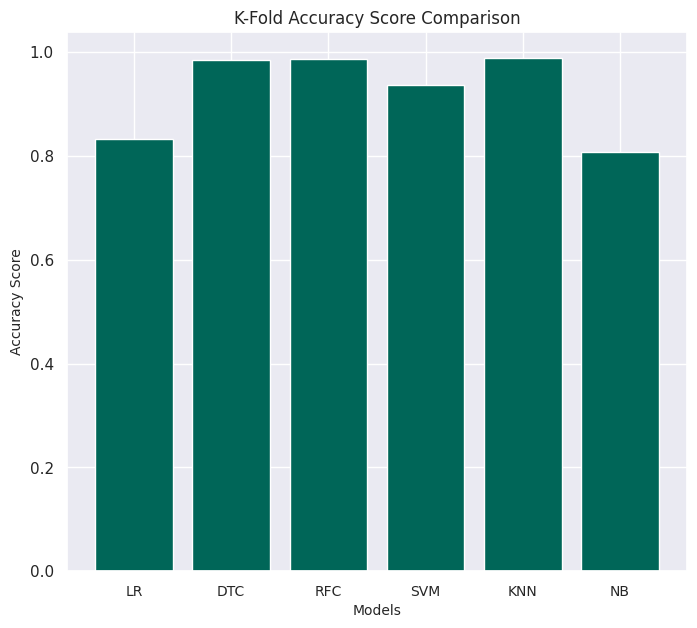

In [ ]:
sn.set(style="darkgrid")
index = np.arange(len(names))
plt.bar(index, final_score, color='#006658')
plt.xlabel('Models', fontsize=10)
plt.ylabel('Accuracy Score', fontsize=10)
plt.xticks(index, names, fontsize=10)
plt.title('K-Fold Accuracy Score Comparison')
plt.show()

In [ ]:
print("Final Score:\n",final_score)

Final Score:
 [0.8329268292682928, 0.9853658536585366, 0.9878048780487806, 0.9365853658536587, 0.9890243902439024, 0.8073170731707318]


# Best M.L. model

In [ ]:
print("\nBest model is {} with an accuracy of {}%\n\n".format(best_ml.get("model"),round(best_ml.get("accuracy"),4)*100))
best_model = models[best_ml.get("counter")][1]
best_model


Best model is KNN with an accuracy of 98.9%




KNeighborsClassifier(metric='manhattan', n_neighbors=50, weights='distance')

In [ ]:
y_pred = best_model.predict(X_test)
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       109

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



# Dataset Cite
```
Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert.
(1988).
Heart Disease.
UCI Machine Learning Repository.
https://doi.org/10.24432/C52P4X.

```